In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
os.chdir('D:/Traffic')
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [4]:
data =[]
labels=[]
classes=43
cur_path=os.getcwd()

In [5]:
cur_path

'D:\\Traffic'

In [7]:
for i in range(classes):
    path=os.path.join(cur_path,'train',str(i))
    images=os.listdir(path)
    for a in images:
        try:
            image=Image.open(path+'\\'+a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [8]:
data=np.array(data)
labels=np.array(labels)

In [9]:
os.mkdir('training')

In [10]:
np.save('./training/data',data)
np.save('./training/target',labels)

In [11]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [12]:
print(data.shape)

(39209, 30, 30, 3)


In [13]:
print(labels.shape)

(39209,)


In [17]:
x_train,x_test,y_train,y_test= train_test_split(data,labels,test_size=0.2,random_state=0)

In [18]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape:  (31367, 30, 30, 3)
y_train shape:  (31367,)
x_test shape :  (7842, 30, 30, 3)
y_test shape :  (7842,)


In [20]:
x_train

array([[[[ 23,  20,  22],
         [ 24,  21,  23],
         [ 24,  22,  23],
         ...,
         [ 21,  19,  21],
         [ 20,  18,  20],
         [ 21,  19,  20]],

        [[ 21,  19,  21],
         [ 22,  20,  20],
         [ 22,  21,  21],
         ...,
         [ 21,  18,  20],
         [ 21,  18,  21],
         [ 21,  19,  20]],

        [[ 21,  19,  20],
         [ 21,  20,  20],
         [ 22,  20,  21],
         ...,
         [ 20,  17,  19],
         [ 20,  18,  19],
         [ 21,  19,  20]],

        ...,

        [[ 21,  18,  20],
         [ 20,  19,  21],
         [ 21,  19,  20],
         ...,
         [ 19,  17,  18],
         [ 18,  17,  18],
         [ 19,  18,  20]],

        [[ 21,  19,  21],
         [ 22,  20,  22],
         [ 23,  20,  21],
         ...,
         [ 19,  16,  18],
         [ 18,  17,  19],
         [ 19,  17,  19]],

        [[ 19,  17,  20],
         [ 20,  18,  20],
         [ 21,  19,  21],
         ...,
         [ 17,  15,  18],
        

In [19]:
y_train

array([ 5,  4, 35, ..., 26, 13,  2])

In [21]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [23]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5),activation='relu',input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
h = model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
981/981 [==============================] - 97s 94ms/step - loss: 2.0155 - accuracy: 0.5040 - val_loss: 0.4386 - val_accuracy: 0.8963
Epoch 2/20
981/981 [==============================] - 88s 90ms/step - loss: 0.6052 - accuracy: 0.8253 - val_loss: 0.2595 - val_accuracy: 0.9348
Epoch 3/20
981/981 [==============================] - 88s 90ms/step - loss: 0.4301 - accuracy: 0.8770 - val_loss: 0.1554 - val_accuracy: 0.9594
Epoch 4/20
981/981 [==============================] - 90s 92ms/step - loss: 0.3324 - accuracy: 0.9046 - val_loss: 0.1012 - val_accuracy: 0.9730
Epoch 5/20
981/981 [==============================] - 89s 90ms/step - loss: 0.2814 - accuracy: 0.9196 - val_loss: 0.0896 - val_accuracy: 0.9768
Epoch 6/20
981/981 [==============================] - 89s 91ms/step - loss: 0.2516 - accuracy: 0.9284 - val_loss: 0.0669 - val_accuracy: 0.9830
Epoch 7/20
981/981 [==============================] - 89s 91ms/step - loss: 0.2489 - accuracy: 0.9322 - val_loss: 0.0818 - val_accuracy:

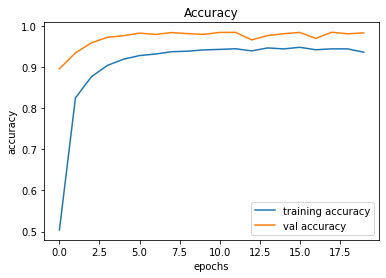

In [28]:
plt.figure(0)
plt.plot(h.history['accuracy'],label='training accuracy')
plt.plot(h.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

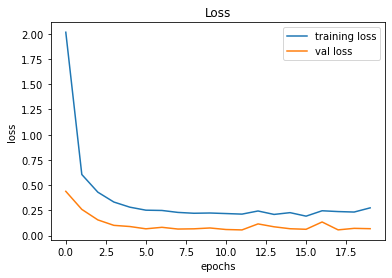

In [29]:
plt.plot(h.history['loss'],label='training loss')
plt.plot(h.history['val_loss'],label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
def testing(testcsv):
    y_test=pd.read_csv(testcsv)
    label=y_test["ClassId"].values
    imgs =y_test["Path"].values
    data=[]
    for img in imgs:
        image=Image.open(img)
        image=image.resize((30,30))
        data.append(np.array(image))
    x_test=np.array(data)
    return x_test,label

In [31]:
x_test , label=testing('Test.csv')

In [32]:
y_pred=model.predict_classes(x_test)
y_pred

C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ..., 32,  7, 10], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(label,y_pred))

Accuracy : 0.953285827395091


In [34]:
model.save("./training/TSR.h5")

In [36]:
import os 
os.chdir(r'D:\Traffic')
from tensorflow.keras.models import load_model
model= load_model('./training/TSR.h5')

In [37]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image=Image.open(img)
    image=image.resize((30,30))
    data.append(np.array(image))
    x_test=np.array(data)
    y_pred=model.predict_classes(x_test)
    return image,y_pred

Traffic sign(predicted) is :  Speed limit (120km/h)


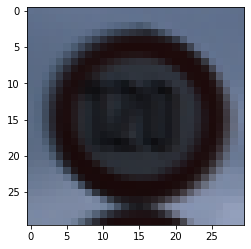

In [50]:
plot,prediction = test_on_img(r'D:\Traffic\Test\05396.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Traffic sign(predicted) is : ",classes[a])
plt.imshow(plot)

plt.show()